<a href="https://colab.research.google.com/github/iamleevn/pedestrian-detection/blob/master/thesis_detectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detection

In [ ]:
!pip install -q gwpy

     |████████████████████████████████| 1.4 MB 5.5 MB/s 
     |████████████████████████████████| 2.9 MB 43.2 MB/s 
     |████████████████████████████████| 6.5 MB 14.7 MB/s 
     |████████████████████████████████| 25.9 MB 5.7 kB/s 
     |████████████████████████████████| 48 kB 6.8 MB/s 


In [ ]:
%%capture
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-08-26 05:08:31--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   229MB/s    in 0.4s    

2020-08-26 05:08:32 (229 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

In [ ]:
#check CUDA version
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# Change CUDA version
!mv "../usr/local/cuda" "../usr/local/cudahigher"
!mv "../usr/local/cuda-10.0" "../usr/local/cuda"

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [ ]:
# Install other required dependencies
%%capture
%%shell

conda install -y pytorch==1.2.0 torchvision==0.4.0 cudatoolkit=10.0 -c pytorch
conda install -y cython
conda install -c pytorch -y nccl2
pip install mmcv==0.2.14 #not in conda
conda install -y ipykernel

Solving environment: / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=10.0
    - pytorch==1.2.0
    - torchvision==0.4.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    ca-certificates-2020.7.22  |                0         125 KB
    certifi-2020.6.20          |           py37_0         156 KB
    conda-4.8.4                |           py37_0         2.9 MB
    cudatoolkit-10.0.130       |                0       261.2 MB
    freetype-2.10.2            |       h5ab3b9f_0         608 KB
    intel-openmp-2020.2        |              254         786 KB
    jpeg-9b                    |       h024ee3a_2         214 KB
    lcms2-2.11                 |       h396b838_0         307 KB
    libpng-1.6.37              |       hbc83047_0       

In [ ]:
%%shell
# git clone https://github.com/hasanirtiza/Pedestron.git
git clone https://github.com/iamleevn/pedestrian-detection

Cloning into 'pedestrian-detection'...
remote: Enumerating objects: 410, done.
remote: Counting objects: 100% (410/410), done.
remote: Compressing objects: 100% (325/325), done.
remote: Total 410 (delta 84), reused 394 (delta 72), pack-reused 0
Receiving objects: 100% (410/410), 6.26 MiB | 13.58 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [ ]:
# setup mmdetection and other dependencies
%%capture
%%shell

cd /content/pedestrian-detection/Pedestron
# conda run python setup.py develop
pip install -v -e .

Streaming output truncated to the last 5000 lines.
     inline void deprecated_AT_CHECK() {}
                 ^~~~~~~~~~~~~~~~~~~
    In file included from /usr/local/lib/python3.7/site-packages/torch/include/c10/core/Device.h:5:0,
                     from /usr/local/lib/python3.7/site-packages/torch/include/c10/core/Allocator.h:6,
                     from /usr/local/lib/python3.7/site-packages/torch/include/ATen/ATen.h:3,
                     from /usr/local/lib/python3.7/site-packages/torch/include/torch/csrc/api/include/torch/types.h:3,
                     from /usr/local/lib/python3.7/site-packages/torch/include/torch/csrc/api/include/torch/data/dataloader_options.h:4,
                     from /usr/local/lib/python3.7/site-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/base.h:3,
                     from /usr/local/lib/python3.7/site-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/stateful.h:3,
                     from /usr/local/lib/py

In [ ]:
# download model
!pip install gdown

# Pedestron
!gdown https://drive.google.com/uc?id=1MqI1-Bbn0vl5Ft1RnhD70YWl7JHRyVMx -O CascadeRCNNCP_model.pth.stu
!mkdir /content/pedestrian-detection/Pedestron/models_pretrained/ && cp CascadeRCNNCP_model.pth.stu /content/pedestrian-detection/Pedestron/models_pretrained/

# YOLOv4 pretrained COCO
!gdown https://drive.google.com/uc?id=1wv_LiFeCRYwtpkqREPeI13-gPELBDwuJ -O /content/pedestrian-detection/pytorch-YOLOv4/weights/

# YOLOv4 custom KAIST
!gdown https://drive.google.com/a/gm.uit.edu.vn/uc?id=1-082uknrKaHemlvWwZp_mB7iOryqch9B -O /content/pedestrian-detection/pytorch-YOLOv4/weights/yolov4.weights

Downloading...
From: https://drive.google.com/a/gm.uit.edu.vn/uc?id=1-082uknrKaHemlvWwZp_mB7iOryqch9B
To: /content/pedestrian-detection/pytorch-YOLOv4/weights/yolov4.weights
256MB [00:01, 231MB/s]


In [ ]:
# create result folder
!mkdir /content/pedestrian-detection/result_images

# Pedestron's detection
%cd /content/pedestrian-detection/Pedestron
!python tools/demo.py configs/elephant/crowdhuman/cascade_hrnet.py ./models_pretrained/CascadeRCNNCP_model.pth.stu /content/pedestrian-detection/demo_images /content/pedestrian-detection/result_images

# YOLOv4 pretrained COCO's detection
%cd /content/pedestrian-detection/pytorch-YOLOv4
!python models.py weights/yolov4.pth /content/pedestrian-detection/demo_images /content/pedestrian-detection/result_images

# YOLOv4 customed KAIST's detection
%cd /content/pedestrian-detection/pytorch-YOLOv4
!python demo.py

In [ ]:
# show results
def show_result(path):
    import os
    import glob
    import math
    import matplotlib.pyplot as plt
    from matplotlib.image import imread
    from matplotlib.pyplot import figure, imshow, axis

    images = glob.glob(os.path.join(path, '*.jpg'))
    images.sort()
    fig = figure(figsize=(15, 15))
    nof = len(images)
    if nof < 2:
        col = 1
        row = 1
        fig = figure(figsize=(15, 15))
    else:
        col = 3
        row = math.ceil(nof/col)
        fig = figure(figsize=(15, 5 * row))

    print(nof, row, col)
    for i in range(nof):
        fig.add_subplot(row, col, i+1)
        image = imread(images[i])
        imshow(image)
        axis('off')

# show result ver 2
def show_result_ver2(path):
  import os
  import math
  import glob
  import matplotlib.pyplot as plt
  from matplotlib.image import imread

  images = glob.glob(os.path.join(path, '*.jpg'))
  images.sort()
  fig = plt.figure(figsize=(15, 15))
  nof = len(images)
  cols = 3
  rows = math.ceil(nof / cols)
  col_names = ['YOLOv4 COCO', 'YOLOv4 KAIST', 'Pedestron']

  ax = []

  for i, image in enumerate(images):
    im = imread(image)
    ax.append(fig.add_subplot(rows, cols, i + 1))
    ax[-1].set_title(col_names[i%3])
    plt.imshow(im)

  plt.show()

12 4 3


<Figure size 1080x1080 with 0 Axes>

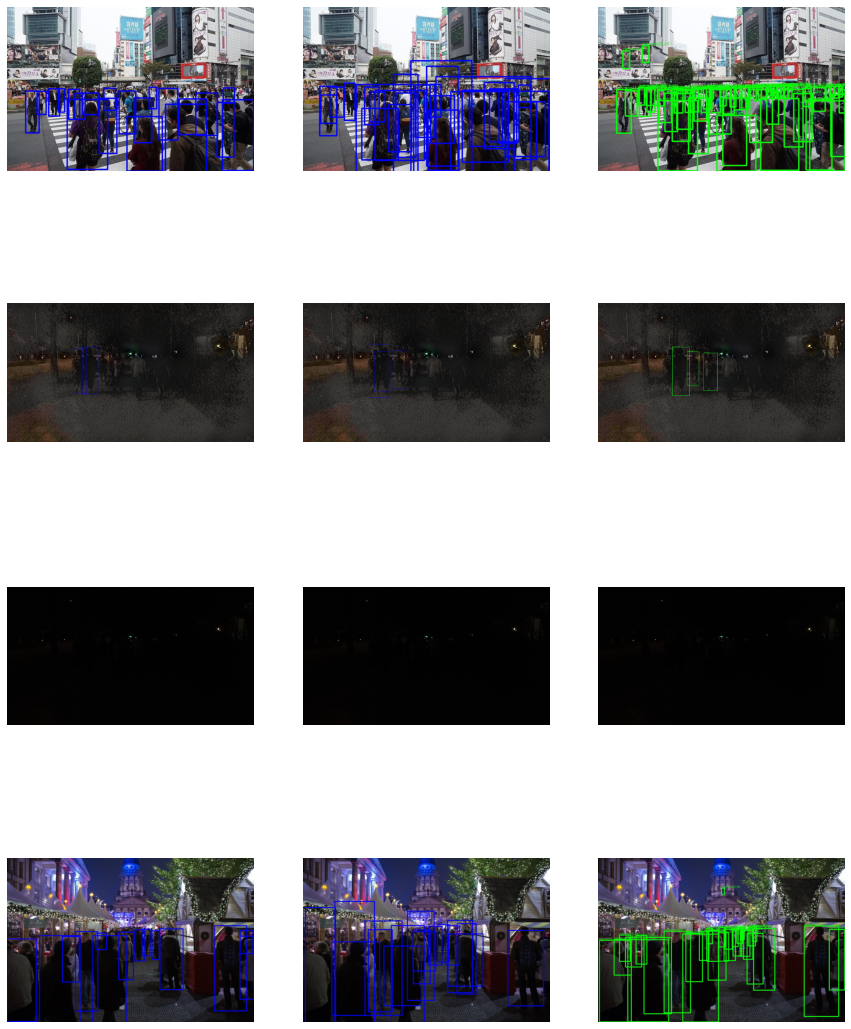

In [ ]:
# show demo detections
show_result_ver2('/content/pedestrian-detection/result_images')

# Run on your images

In [ ]:
%cd /content/
!mkdir your_images
!mkdir your_result_images

/content


In [ ]:
# upload your images - you can uploade many images per time
%cd /content/your_images/
from google.colab import files
your_images = []
uploaded = files.upload()
for fn in uploaded.keys():
    your_images.append(fn)

/content/your_images


Saving 17.jpg to 17.jpg


In [ ]:
%%capture

# Pedestron
%cd /content/pedestrian-detection/Pedestron
!python tools/demo.py configs/elephant/crowdhuman/cascade_hrnet.py ./models_pretrained/CascadeRCNNCP_model.pth.stu /content/your_images/ /content/your_result_images/

# YOLOv4 COCO
%cd /content/pedestrian-detection/pytorch-YOLOv4
!python models.py weights/yolov4.pth /content/your_images/ /content/your_result_images/

# YOLOv4 KAIST
%cd /content/pedestrian-detection/pytorch-YOLOv4
!python demo.py -input_dir /content/your_images/ -output_dir /content/your_result_images/

6 2 3


<Figure size 1080x1080 with 0 Axes>

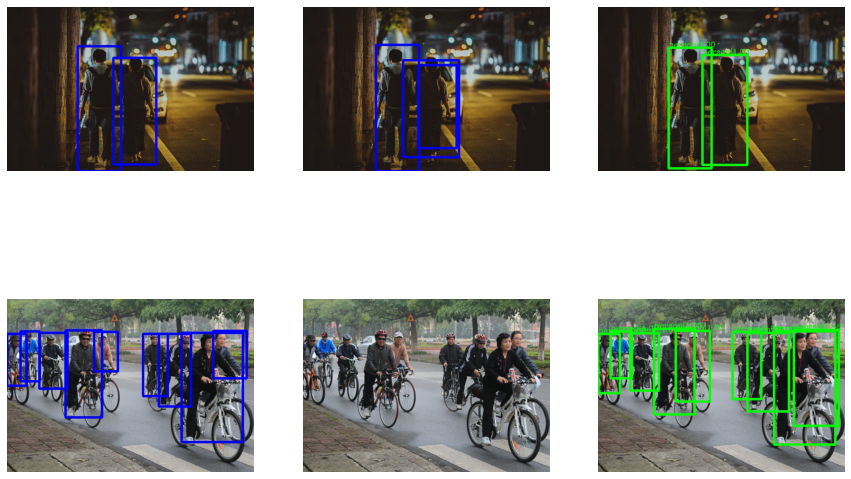

In [ ]:
show_result_ver2("/content/your_result_images/")